In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import os
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
tree_data = np.load("/Users/jsmonzon/Research/data/preliminary/tree_data/test_evo/12_4_0/tree_0_evo.npz")

In [4]:
def main_progenitor_history(datadir, Ntree):
    thin = 25 

    files = []    
    for filename in os.listdir(datadir):
        if filename.startswith('tree') and filename.endswith('evo.npz'): 
            files.append(os.path.join(datadir, filename))

    host_mat = np.zeros(shape=(Ntree,354))
    N_sub = np.zeros(shape=Ntree)
    for i, file in enumerate(files[0:Ntree]):
        tree_data_i = np.load(file)
        if tree_data_i["mass"][0,:].shape[0] == 354:
            host_mat[i] = np.log10(tree_data_i["mass"][0,:])
            surv = []
            for j, val in enumerate(tree_data_i["mass"]):
                final_mass = val[0]
                peak_mass = val.max()
                if np.log10(final_mass) - np.log10(peak_mass) > -4:
                    surv.append(j)
            N_sub[i] = len(surv)

    quant = np.percentile(host_mat, np.array([5, 50, 95]), axis=0, method="closest_observation")
    error = np.array([quant[1][::thin] - quant[0][::thin], quant[2][::thin] - quant[1][::thin]])

    return host_mat, quant, error, N_sub

In [5]:
s0 = np.load("../../../data/progen/s0.npz")
s15 = np.load("../../../data/progen/s15.npz")
s30 = np.load("../../../data/progen/s30.npz")

In [6]:
for i in s0.keys():
    print(i)

host_history
value
error
N_sub


In [7]:
norm = Normalize(vmin=60, vmax=250)
cmap = plt.get_cmap('RdBu_r')
select = np.random.randint(0,1000,1000)

In [8]:
s0_SHMF = jsm_halopull.MassMat("../../../data/MW-analog/meta_data_psi3/", save=False, plot=False, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)
s15_SHMF = jsm_halopull.MassMat("../../../data/cross_host/lognorm_015_psi3/", save=False, plot=False, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)
s30_SHMF = jsm_halopull.MassMat("../../../data/cross_host/lognorm_030_psi3/", save=False, plot=False, phi_res=-4, min_mass=9, max_mass=12.5, Nbins=35)

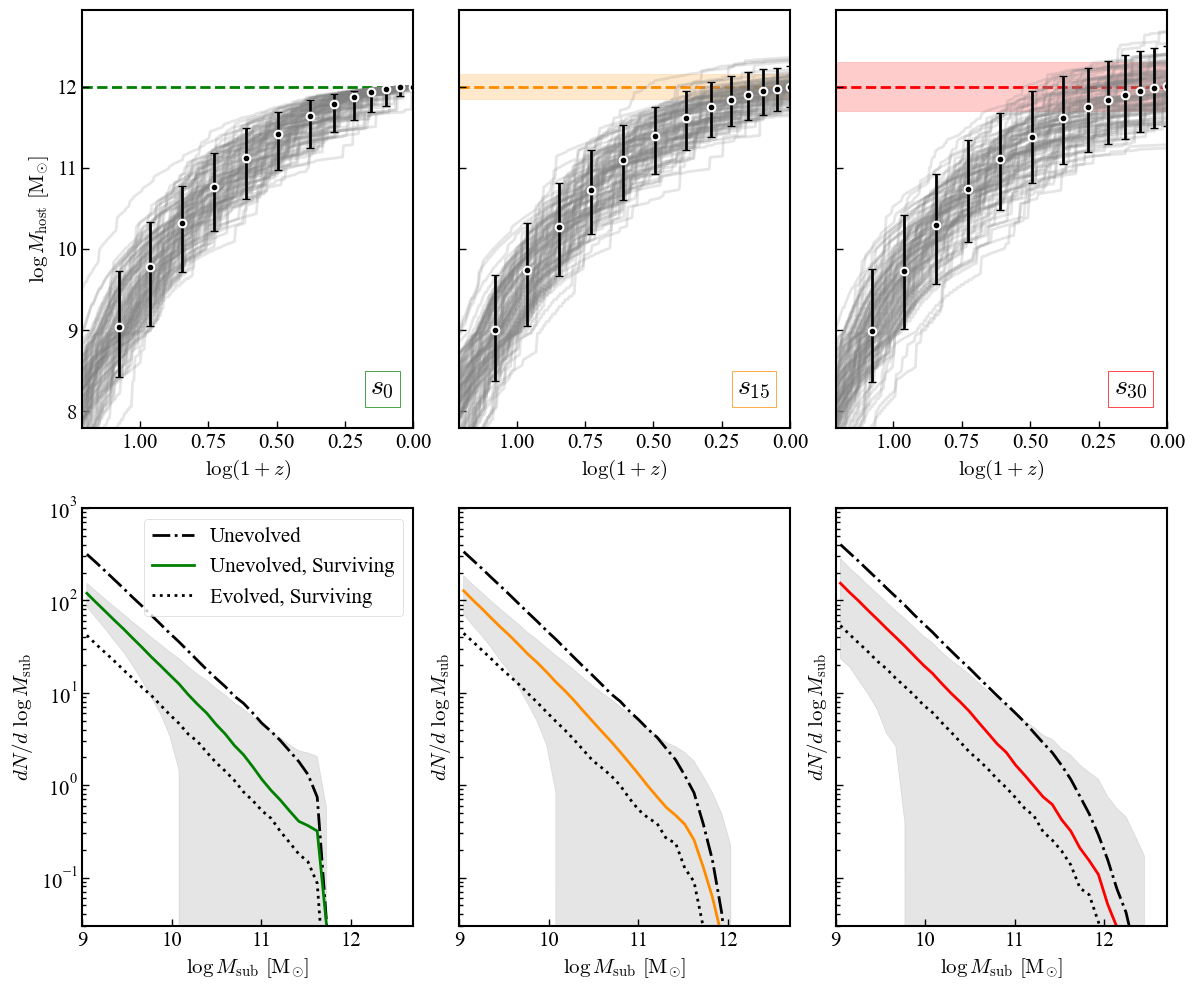

In [9]:
thin = 25
fig, axs = plt.subplots(ncols=3, nrows=2, sharey="row", figsize=(12,10))

for i in range(100):
    axs[0, 0].plot(np.log10(tree_data["redshift"]+1), s0["host_history"][i], color="grey", alpha=0.2)
    axs[0, 1].plot(np.log10(tree_data["redshift"]+1), s15["host_history"][i], color="grey", alpha=0.2)
    axs[0, 2].plot(np.log10(tree_data["redshift"]+1), s30["host_history"][i], color="grey", alpha=0.2)

axs[0, 0].errorbar(np.log10(tree_data["redshift"][::thin]+1), s0["value"], yerr=s0["error"], fmt="o", capsize=3, color="white")
axs[0, 0].errorbar(np.log10(tree_data["redshift"][::thin]+1), s0["value"], yerr=s0["error"], fmt=".", capsize=3, color="black")

axs[0, 1].errorbar(np.log10(tree_data["redshift"][::thin]+1), s15["value"], yerr=s15["error"], fmt="o", capsize=3, color="white")
axs[0, 1].errorbar(np.log10(tree_data["redshift"][::thin]+1), s15["value"], yerr=s15["error"], fmt=".", capsize=3, color="black")

axs[0, 2].errorbar(np.log10(tree_data["redshift"][::thin]+1), s30["value"], yerr=s30["error"], fmt="o", capsize=3, color="white")
axs[0, 2].errorbar(np.log10(tree_data["redshift"][::thin]+1), s30["value"], yerr=s30["error"], fmt=".", capsize=3, color="black")

axs[0, 0].text(0.87, 0.08, "$s_0$", transform=axs[0,0].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axs[0,1].text(0.84, 0.08, "$s_{15}$", transform=axs[0,1].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axs[0,2].text(0.84, 0.08, "$s_{30}$", transform=axs[0,2].transAxes, fontsize=20, fontweight='bold', bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

axs[0, 0].set_xlim(1.21,0)
axs[0, 1].set_xlim(1.21,0)
axs[0, 2].set_xlim(1.21,0)

axs[0, 0].set_ylim(7.8)
axs[0, 0].set_xlabel("$\log (1+z)$")
axs[0, 1].set_xlabel("$\log (1+z)$")
axs[0, 2].set_xlabel("$\log (1+z)$")

axs[0, 0].axhline(12, color="green", ls="--", zorder=0)
axs[0, 1].axhline(12, color="darkorange", ls="--", zorder=0)
axs[0, 1].axhspan(11.85, 12.15,  color="darkorange", alpha=0.2, zorder=0)
axs[0, 2].axhline(12, color="red", ls="--", zorder=0)
axs[0, 2].axhspan(11.7, 12.3,  color="red", alpha=0.2, zorder=0)
axs[0, 0].set_ylabel("$\log M_{\mathrm{host}}\ [\mathrm{M}_{\odot}]$")

#-----

axs[1, 0].plot(s0_SHMF.lgMh_bincenters, s0_SHMF.acc_SHMF_werr[0], label="Unevolved", color="black", ls="-.")
axs[1, 0].plot(s0_SHMF.lgMh_bincenters, s0_SHMF.acc_surv_SHMF_werr[0], label="Unevolved, Surviving", color="green")
axs[1, 0].fill_between(s0_SHMF.lgMh_bincenters, y1=s0_SHMF.acc_surv_SHMF_werr[0]-s0_SHMF.acc_surv_SHMF_werr[1], y2=s0_SHMF.acc_surv_SHMF_werr[0]+s0_SHMF.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axs[1, 0].plot(s0_SHMF.lgMh_bincenters, s0_SHMF.surv_SHMF_werr[0], label="Evolved, Surviving", color="black", ls=":")
axs[1, 0].legend()
axs[1, 0].set_ylabel("$dN / d\ \log M_{\mathrm{sub}}$")

axs[1, 1].plot(s15_SHMF.lgMh_bincenters, s15_SHMF.acc_SHMF_werr[0], label="Unevolved", color="black", ls="-.")
axs[1, 1].plot(s15_SHMF.lgMh_bincenters, s15_SHMF.acc_surv_SHMF_werr[0], label="Unevolved, Surviving", color="darkorange")
axs[1, 1].fill_between(s15_SHMF.lgMh_bincenters, y1=s15_SHMF.acc_surv_SHMF_werr[0]-s15_SHMF.acc_surv_SHMF_werr[1], y2=s15_SHMF.acc_surv_SHMF_werr[0]+s15_SHMF.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axs[1, 1].plot(s15_SHMF.lgMh_bincenters, s15_SHMF.surv_SHMF_werr[0], label="Evolved, Surviving", color="black", ls=":")

axs[1, 1].set_ylabel("$dN / d\ \log M_{\mathrm{sub}}$")

axs[1, 2].plot(s30_SHMF.lgMh_bincenters, s30_SHMF.acc_SHMF_werr[0], label="Unevolved", color="black", ls="-.")
axs[1, 2].plot(s30_SHMF.lgMh_bincenters, s30_SHMF.acc_surv_SHMF_werr[0], label="Unevolved, Surviving", color="red")
axs[1, 2].fill_between(s30_SHMF.lgMh_bincenters, y1=s30_SHMF.acc_surv_SHMF_werr[0]-s30_SHMF.acc_surv_SHMF_werr[1], y2=s30_SHMF.acc_surv_SHMF_werr[0]+s30_SHMF.acc_surv_SHMF_werr[1], alpha=0.1, color="black")
axs[1, 2].plot(s30_SHMF.lgMh_bincenters, s30_SHMF.surv_SHMF_werr[0], label="Evolved, Surviving", color="black", ls=":")

axs[1, 0].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1, 1].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1, 2].set_xlabel("$\log M_{\mathrm{sub}}\ [\mathrm{M}_{\odot}]$")
axs[1, 0].set_xlim(9,12.7)
axs[1, 1].set_xlim(9,12.7)
axs[1, 2].set_xlim(9,12.7)

axs[1, 2].set_ylabel("$dN / d\ \log M_{\mathrm{sub}}$")
axs[1, 2].set_ylim(0.03, 1000)
axs[1, 2].set_yscale("log")

plt.tight_layout()
plt.savefig("../../../paper_1/figures/updated/progen_history.pdf", bbox_inches="tight")
plt.show()
